In [161]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Sleep_Efficiency.csv")
df['Sleep total quality'] = df['Sleep duration']*df['Sleep efficiency']
# Display the first few rows
df.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep total quality
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,5.28
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,4.62
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,7.12
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,3.06
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,6.08


In [162]:
# Ensure no missing values in the caffeine column
df = df.dropna(subset=['Caffeine consumption'])

# Split the data
caffeine_users = df[df['Caffeine consumption'] > 0]
non_caffeine_users = df[df['Caffeine consumption'] == 0]

# Calculate means, std, counts
summary = pd.DataFrame({
    "Group": ["Caffeine Users", "Non-Caffeine Users"],
    "Mean": [
        caffeine_users["Sleep total quality"].mean(),
        non_caffeine_users["Sleep total quality"].mean()
    ],
    "Std": [
        caffeine_users["Sleep total quality"].std(),
        non_caffeine_users["Sleep total quality"].std()
    ],
    "Count": [
        caffeine_users["Sleep total quality"].count(),
        non_caffeine_users["Sleep total quality"].count()
    ]
})

print(summary)


                Group      Mean       Std  Count
0      Caffeine Users  5.948565  1.207666    216
1  Non-Caffeine Users  5.839076  1.194978    211


##  feature selection - correlation matrix:

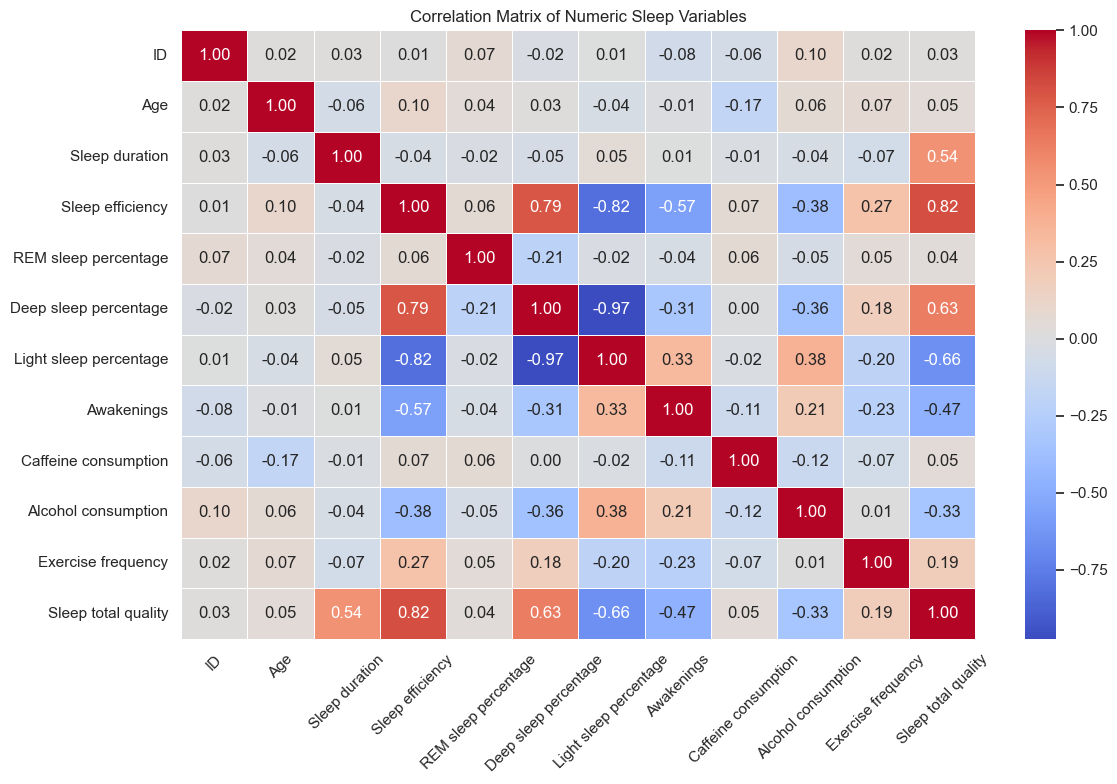

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Sleep Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# normality checks:

## 1. histograms:

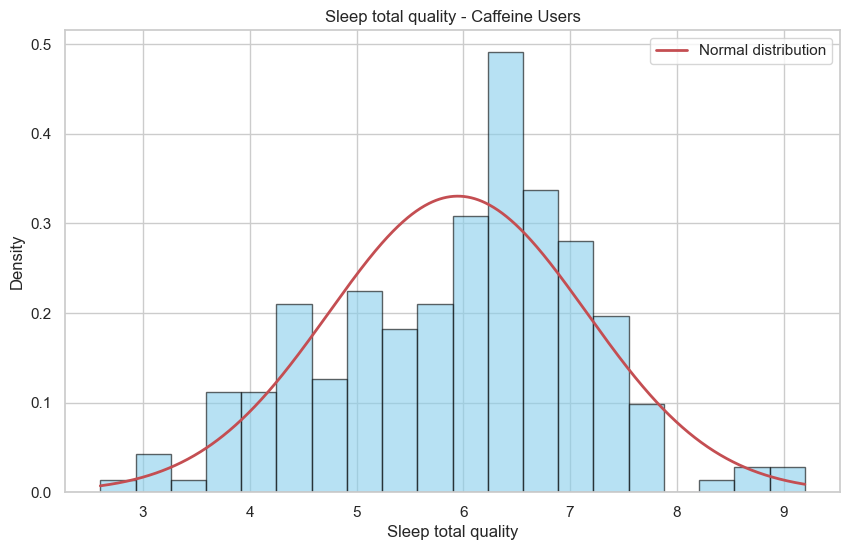

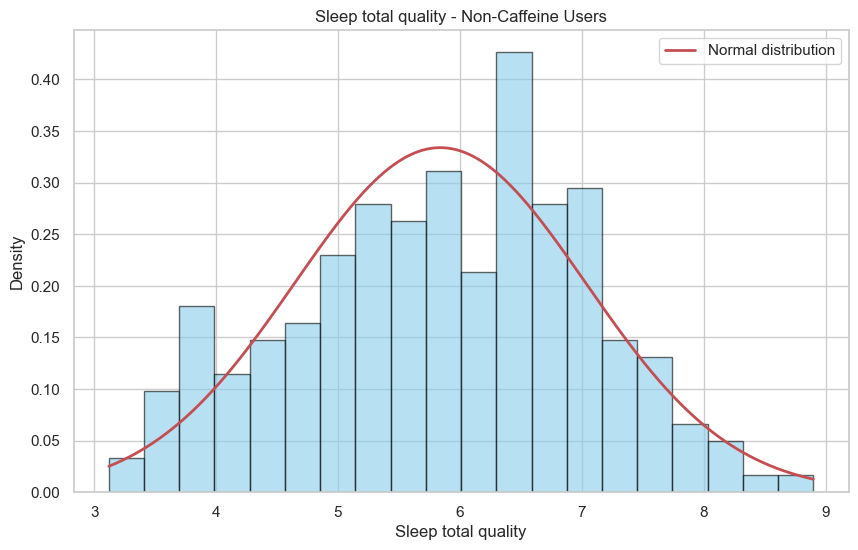

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_histogram_with_normal(dataframe, column, title=None, xlabel=None, bins=20, color='skyblue'):
    data = dataframe[column].dropna()
    mu = data.mean()
    sigma = data.std()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    count, bins_hist, ignored = plt.hist(data, bins=bins, density=True, edgecolor='black', color=color, alpha=0.6)

    # Overlay normal distribution
    x = np.linspace(min(data), max(data), 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal distribution', linewidth=2)

    # Titles and labels
    plt.title(title or f'Distribution of {column}')
    plt.xlabel(xlabel or column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_histogram_with_normal(caffeine_users, 'Sleep total quality', title='Sleep total quality - Caffeine Users')
plot_histogram_with_normal(non_caffeine_users, 'Sleep total quality', title='Sleep total quality - Non-Caffeine Users')


## 2. QQ Plot:

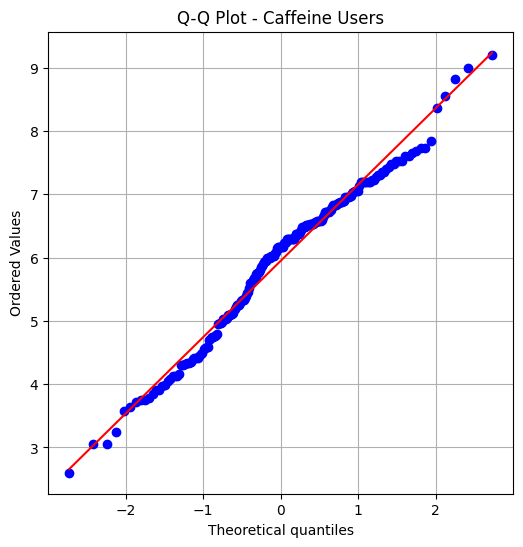

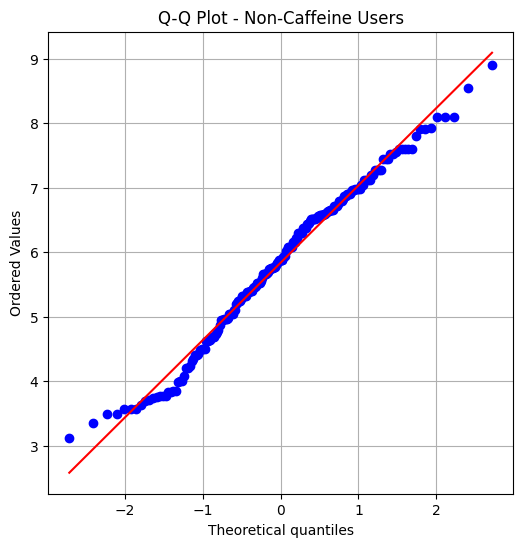

In [101]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_qq(dataframe, column, title=None):
    plt.figure(figsize=(6, 6))
    stats.probplot(dataframe[column].dropna(), dist="norm", plot=plt)
    plt.title(title or f"Q-Q Plot of {column}")
    plt.grid(True)
 ## 1. histograms:   plt.show()

plot_qq(caffeine_users, 'Sleep total quality', title='Q-Q Plot - Caffeine Users')
plot_qq(non_caffeine_users, 'Sleep total quality', title='Q-Q Plot - Non-Caffeine Users')


## 3. Shapiro-Wilk Test:

In [179]:
from scipy.stats import shapiro

def test_normality_shapiro(dataframe, column, header):
    data = dataframe[column].dropna()
    stat, p = shapiro(data)
    print(f"\nShapiro-Wilk Test for {header}:")
    print(f"  p-value   = {p:.20f}")

    if p > 0.05:
        print("  ✔ Likely normal (fail to reject H0)")
    else:
        print("  ✘ Not normal (reject H0)")
test_normality_shapiro(caffeine_users, 'Sleep total quality', 'Caffeine Users' )
test_normality_shapiro(non_caffeine_users, 'Sleep total quality', 'Non-Caffeine Users')



Shapiro-Wilk Test for Caffeine Users:
  p-value   = 0.00690092798322439194
  ✘ Not normal (reject H0)

Shapiro-Wilk Test for Non-Caffeine Users:
  p-value   = 0.02915395051240921021
  ✘ Not normal (reject H0)


## 4. KS test:

In [181]:
from scipy.stats import kstest
import numpy as np

def test_normality_ks(dataframe, column, header):
    data = dataframe[column].dropna()
    standardized_data = (data - np.mean(data)) / np.std(data)

    stat, p = kstest(standardized_data, 'norm')
    print(f"\nKolmogorov-Smirnov Test for {header}:")
    print(f"  Statistic = {stat:.4f}")
    print(f"  P-value   = {p:.20f}")

    if p > 0.05:
        print("  ✔ Likely normal (fail to reject H0)")
    else:
        print("  ✘ Not normal (reject H0)")

test_normality_ks(caffeine_users, 'Sleep total quality', 'Caffeine Users')
test_normality_ks(non_caffeine_users, 'Sleep total quality', 'Non-Caffeine Users')


Kolmogorov-Smirnov Test for Caffeine Users:
  Statistic = 0.0911
  P-value   = 0.05203267245366538507
  ✔ Likely normal (fail to reject H0)

Kolmogorov-Smirnov Test for Non-Caffeine Users:
  Statistic = 0.0639
  P-value   = 0.34012556284661410455
  ✔ Likely normal (fail to reject H0)


## 4. Anderson-Darling test:

In [183]:
from scipy.stats import anderson

def test_normality_anderson(dataframe, column, header):
    data = dataframe[column].dropna()
    result = anderson(data, dist='norm')

    print(f"\nAnderson-Darling Test for {header}:")
    print(f"  Statistic = {result.statistic:.4f}")

    for i in range(len(result.critical_values)):
        sl = result.significance_level[i]
        cv = result.critical_values[i]
        conclusion = "✔ Likely normal" if result.statistic < cv else "✘ Not normal"
        print(f"  Significance level: {sl:.1f}% | Critical value: {cv:.3f} → {conclusion} at this level")

test_normality_anderson(caffeine_users, 'Sleep total quality', 'Caffeine Users')
test_normality_anderson(non_caffeine_users, 'Sleep total quality', 'Non-Caffeine Users')


Anderson-Darling Test for Caffeine Users:
  Statistic = 1.7221
  Significance level: 15.0% | Critical value: 0.566 → ✘ Not normal at this level
  Significance level: 10.0% | Critical value: 0.644 → ✘ Not normal at this level
  Significance level: 5.0% | Critical value: 0.773 → ✘ Not normal at this level
  Significance level: 2.5% | Critical value: 0.902 → ✘ Not normal at this level
  Significance level: 1.0% | Critical value: 1.073 → ✘ Not normal at this level

Anderson-Darling Test for Non-Caffeine Users:
  Statistic = 0.8608
  Significance level: 15.0% | Critical value: 0.566 → ✘ Not normal at this level
  Significance level: 10.0% | Critical value: 0.644 → ✘ Not normal at this level
  Significance level: 5.0% | Critical value: 0.773 → ✘ Not normal at this level
  Significance level: 2.5% | Critical value: 0.901 → ✔ Likely normal at this level
  Significance level: 1.0% | Critical value: 1.072 → ✔ Likely normal at this level


# confidence interval:

In [137]:
import numpy as np
from scipy.stats import t

# Calculate the difference in means
mean_diff = caffeine_users['Sleep total quality'].mean() - non_caffeine_users['Sleep total quality'].mean()

# Standard errors
se1 = caffeine_users['Sleep total quality'].std(ddof=1) / np.sqrt(caffeine_users.shape[0])
se2 = non_caffeine_users['Sleep total quality'].std(ddof=1) / np.sqrt(non_caffeine_users.shape[0])

# Degrees of freedom
df_combined = caffeine_users.shape[0] + non_caffeine_users.shape[0] - 2

# Standard error of the difference
se_diff = np.sqrt(se1**2 + se2**2)

# Confidence intervals
confidence_levels = [0.95, 0.90, 0.80, 0.7]
ci_results = {}

for conf in confidence_levels:
    alpha = 1 - conf
    t_crit = t.ppf(1 - alpha / 2, df=df_combined)
    ci_lower = mean_diff - t_crit * se_diff
    ci_upper = mean_diff + t_crit * se_diff
    ci_results[conf] = (ci_lower, ci_upper)

# Output
print(f"Calculated difference in means: {mean_diff:.3f}")
for conf, (lower, upper) in ci_results.items():
    print(f"{int(conf*100)}% CI for difference in means: ({lower:.2f}, {upper:.2f})")



Calculated difference in means: 0.109
95% CI for difference in means: (-0.12, 0.34)
90% CI for difference in means: (-0.08, 0.30)
80% CI for difference in means: (-0.04, 0.26)
70% CI for difference in means: (-0.01, 0.23)


# hypothesis tests:

## T test:

In [185]:
from scipy.stats import ttest_ind
from scipy.stats import levene

levene_test = levene(
    caffeine_users["Sleep total quality"],
    non_caffeine_users["Sleep total quality"]
)
t_stat, p_value = ttest_ind(
    caffeine_users["Sleep total quality"],
    non_caffeine_users["Sleep total quality"],
    equal_var=(levene_test.pvalue > 0.05)
)

print(levene_test.pvalue > 0.05)
print("T-test statistic:", t_stat)
print("p-value:", p_value)


True
T-test statistic: 0.9415257507116149
p-value: 0.34697035164372436


## Wilcoxon's Test:

In [147]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(
    caffeine_users['Sleep total quality'],
    non_caffeine_users['Sleep total quality'],
    alternative='two-sided'
)

print(f"Mann–Whitney U test statistic: {u_stat}")
print(f"p-value: {p_val}")

Mann–Whitney U test statistic: 24059.0
p-value: 0.31898028962885905


# Regression:

In [187]:
import statsmodels.api as sm

# Drop missing or extreme values if needed
df_filtered = df.dropna(subset=['Caffeine consumption', 'Sleep total quality'])

# X = actual caffeine consumption
X = sm.add_constant(df_filtered['Caffeine consumption'])
y = df_filtered['Sleep total quality']

# Fit regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Sleep total quality   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.007
Date:                 Sat, 28 Jun 2025   Prob (F-statistic):              0.316
Time:                         03:13:58   Log-Likelihood:                -683.18
No. Observations:                  427   AIC:                             1370.
Df Residuals:                      425   BIC:                             1378.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

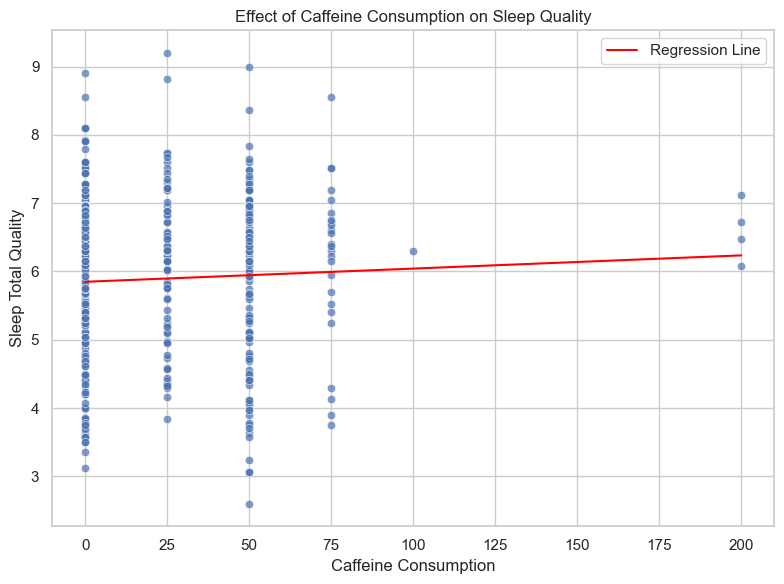

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Caffeine consumption',
    y='Sleep total quality',
    data=df_filtered,
    alpha=0.7
)

# Regression line
x_vals = np.linspace(df_filtered['Caffeine consumption'].min(), df_filtered['Caffeine consumption'].max(), 100)
y_vals = model.params[0] + model.params[1] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Labels
plt.xlabel('Caffeine Consumption')
plt.ylabel('Sleep Total Quality')
plt.title('Effect of Caffeine Consumption on Sleep Quality')
plt.legend()
plt.tight_layout()
plt.show()


# Alcohol mix:

In [148]:
def label_group(row):
    caffeine = row['Caffeine consumption'] > 0
    alcohol = row['Alcohol consumption'] > 0
    if not caffeine and not alcohol:
        return 'No Caffeine or Alcohol'
    elif caffeine and not alcohol:
        return 'Caffeine Only'
    elif not caffeine and alcohol:
        return 'Alcohol Only'
    else:
        return 'Caffeine and Alcohol'

df['Group'] = df.apply(label_group, axis=1)


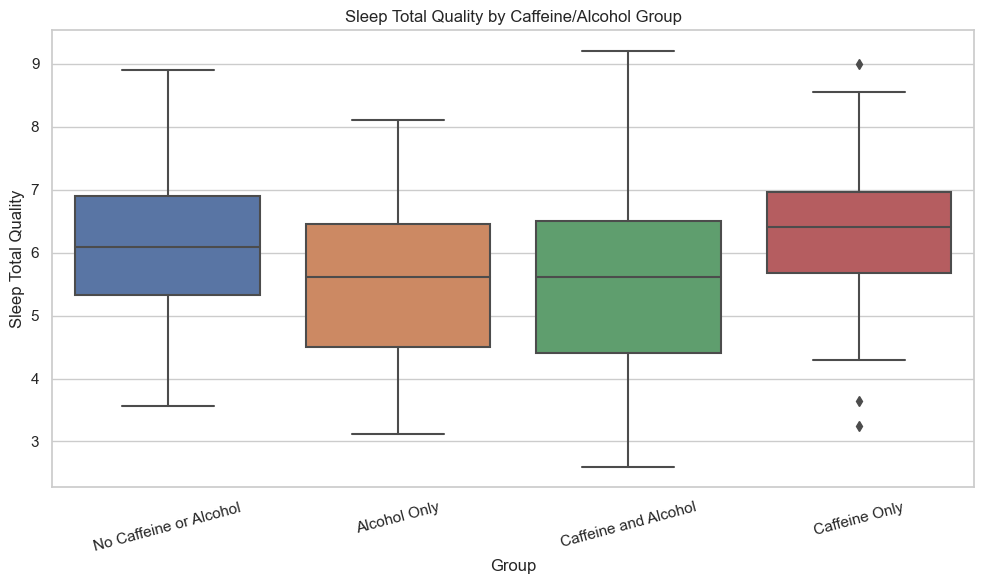

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Group', y='Sleep total quality', data=df)
plt.title('Sleep Total Quality by Caffeine/Alcohol Group')
plt.xticks(rotation=15)
plt.ylabel('Sleep Total Quality')
plt.tight_layout()
plt.show()


In [159]:
from scipy.stats import f_oneway

# Extract sleep quality for each group
grouped = df.groupby('Group')['Sleep total quality'].apply(list)

# Unpack groups
anova_result = f_oneway(*grouped)

print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"p-value: {anova_result.pvalue:.10f}")


F-statistic: 11.861
p-value: 0.0000001792
